In [1]:
import datetime
import os
from mdagent import MDAgent

In [2]:
prompt16 = "Download the PDB file for 1C3W and describe the secondary structure. Then, simulate the protein at 300 K for 1 ns. Plot the RMSD over time and the radius of gyration over time."
llm_var = "accounts/fireworks/models/llama-v3p1-70b-instruct"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools)
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-09-09
time: 12:02:01
LLM:  accounts/fireworks/models/llama-v3p1-70b-instruct 
Temperature:  0.1


In [3]:
answer = agent.run(prompt16)

Thought: To solve this problem, I need to download the PDB file for 1C3W, describe its secondary structure, simulate the protein at 300 K for 1 ns, and plot the RMSD and radius of gyration over time. I will start by downloading the PDB file.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1C3W"
}
```
PDB file found with this ID: 1C3W
Thought: Now that I have the PDB file, I need to describe the secondary structure of the protein. I will use the ComputeDSSP tool to compute the DSSP (secondary structure) assignment for the protein.

Action:
```
{
  "action": "ComputeDSSP",
  "action_input": {
    "traj_file": "1C3W_120204",
    "top_file": "1C3W_120204",
    "target_frames": "all"
  }
}
```

Thought: Now that I have the secondary structure of the protein, I need to simulate the protein at 300 K for 1 ns. I will use the SetUpandRunFunction tool to set up and run a short simulation of the protein.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    

<Figure size 640x480 with 0 Axes>

In [4]:
registry = agent.path_registry
print("ckpt_dir:",os.path.basename(registry.ckpt_dir))
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

ckpt_dir: ckpt_142
Files found in registry: 1C3W_120204: PDB file downloaded from RSCB
 PDBFile ID: 1C3W_120204
 rec0_120205: dssp values for trajectory with id: 1C3W_120204
 1C3W_120212: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_120215: Initial positions for simulation sim0_120215
 sim0_120215: Basic Simulation of Protein 1C3W_120212
 rec0_120219: Simulation trajectory for protein 1C3W_120212 and simulation sim0_120215
 rec1_120219: Simulation state log for protein 1C3W_120212 and simulation sim0_120215
 rec2_120219: Simulation pdb frames for protein 1C3W_120212 and simulation sim0_120215
 rgy_rec2_120219: Radii of gyration per frame for rec2_120219
 fig0_154030: Plot of radii of gyration over time for rec2_120219
 rmsd_120215: RMSD for 120215
 fig0_162127: RMSD plot for 120215


In [5]:
# grab first PDB file and check DSSP. if cleaned, may need to grab 2nd match instead.
import re
import os
matches = re.findall(r"1C3W_\d+", paths_and_descriptions) 
file_id = matches[0]
pdb_path = registry.get_mapped_path(file_id)
assert os.path.exists(pdb_path)
print(f'It is asserted that file path for {file_id} exists')

It is asserted that file path for 1C3W_120204 exists


In [6]:
#secondary structure
import mdtraj as md

traj = md.load(pdb_path)
top = traj.topology
number_of_chains = top.n_chains
secondary_structure = md.compute_dssp(traj,simplified=True)
print("Number of residues in chains: ",number_of_chains)
print("Number of residues in sheets: ",len([i for i in secondary_structure[0] if i == 'E']))
print("Number of residues in helices: ",len([i for i in secondary_structure[0] if i == 'H']))
print("Number of residues in coils: ",len([i for i in secondary_structure[0] if i == 'C']))

Number of residues in chains:  2
Number of residues in sheets:  12
Number of residues in helices:  169
Number of residues in coils:  41


In [8]:
import re
import os

match = re.search(r"rec0_\d+", paths_and_descriptions)
traj_id = match.group(0)
traj_path = registry.get_mapped_path(traj_id)

match = re.search(r"top_sim0_\d+", paths_and_descriptions)
top_id = match.group(0)
top_path = registry.get_mapped_path(top_id)

matches = re.findall(r"fig0_\d+", paths_and_descriptions)
fig_id1 = matches[0]
fig_id2 = matches[1]
fig_path_1 = registry.get_mapped_path(fig_id1) + ".png" # PathRegistry bug with saving RGy figure
fig_path_2 = registry.get_mapped_path(fig_id2)

assert os.path.exists(traj_path)
assert os.path.exists(top_path)
assert os.path.exists(fig_path_1)
assert os.path.exists(fig_path_2)
print(f'It is asserted that file paths for {traj_id}, {top_id}, {fig_id1}, and {fig_id2} exist')
print(f'It is asserted that file paths for {traj_id} and {top_id} exist')

It is asserted that file paths for rec0_120205, top_sim0_120215, fig0_154030, and fig0_162127 exist
It is asserted that file paths for rec0_120205 and top_sim0_120215 exist


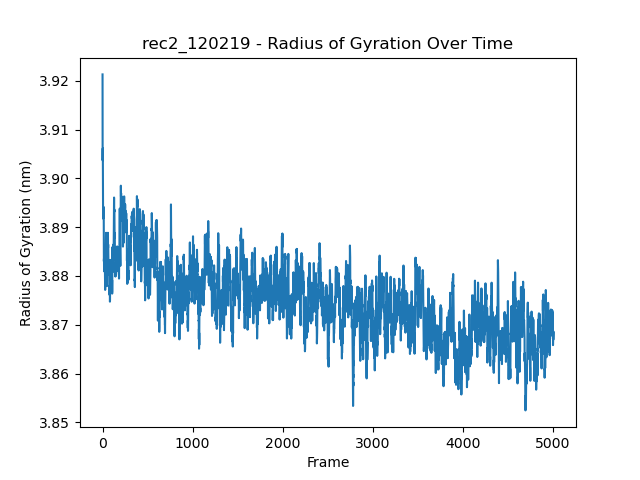

In [9]:
from IPython.display import Image
Image(filename=fig_path_1)

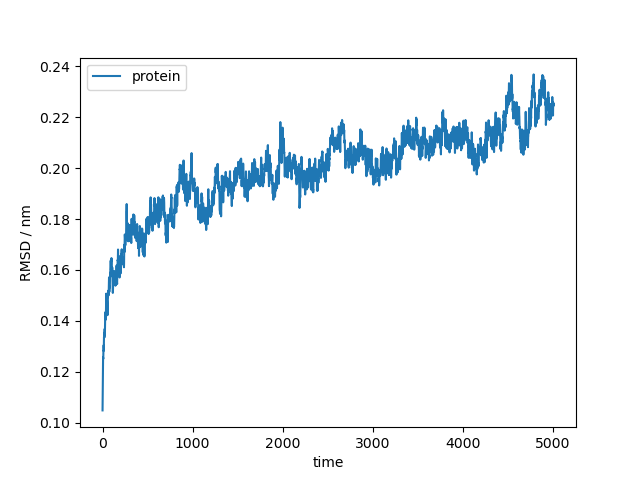

In [10]:
Image(filename=fig_path_2)

# Experiment Result: ✅❌

1. Completed without Exception or TimeOut Errors ✅
2. Attempted all necessary steps ✅
3. Completed without Hallucination ✅
4. Logic make sense ✅
5. Correct Answer ✅